In [138]:
import pandas as pd
import json
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%autosave 120
sns.set(rc={'figure.figsize':(11.7,8.27)})

Autosaving every 120 seconds


In [101]:
!pwd

/media/stuff/Pavel/Code/csv_detective_api/doc


In [168]:
metrics = ['accuracy', 'weighted avg', 'O']

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,10), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 10})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [4]:
df_annotations = pd.read_csv("../csv_detective_ml/data/columns_annotation_nonewtypes.csv").iloc[:, 0:5]

In [180]:
# print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O")))
res_dict = classification_report(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O"), output_dict=True)
conf_matrix_csv_rb = confusion_matrix(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O"))
foo = pd.DataFrame(res_dict).transpose()
classif_df = foo.drop(metrics)
print(classification_report(df_annotations.human_detected.dropna(), df_annotations.csv_detected.fillna("O")))

/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pavel/miniconda2/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  '

,f1-score,precision,recall,support
adresse,1.000000,1.000000,1.000000,22.0
booleen,0.759703,0.638003,0.938776,490.0
code_commune_insee,0.823529,0.833333,0.813953,43.0
code_departement,0.361702,0.354167,0.369565,46.0
code_postal,0.876033,1.000000,0.779412,68.0
code_region,0.865672,0.763158,1.000000,29.0
commune,0.745763,0.977778,0.602740,73.0
date,0.840336,0.751880,0.952381,105.0
datetime_iso,1.000000,1.000000,1.000000,2.0
departement,0.800000,1.000000,0.666667,9.0


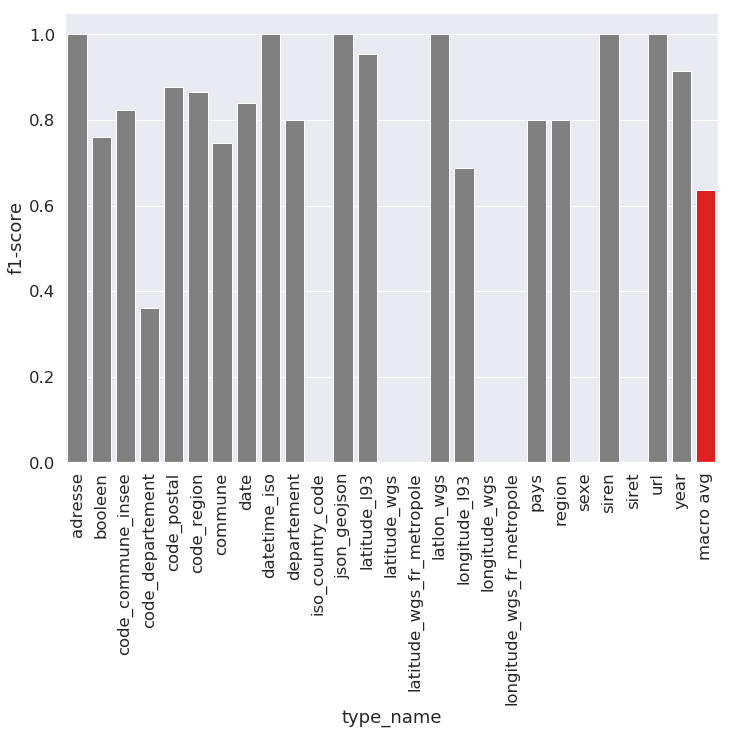

In [169]:
foo = foo[["precision", "recall", "f1-score", "support"]]
foo["type_name"] = foo.index
# print(foo)
# sns.set_palette("colorblind")
sns.set()
sns.set(font_scale=1.5)  # crazy big
pal_bar = ["grey" if "macro" not in f else "red" for f in foo.drop(metrics).index ]
sns.barplot(x="type_name", y="f1-score", data=foo.drop(metrics), palette=pal_bar)
plt.xticks(rotation=90)
plt.savefig("img/rb_f1.png", figsize=(10, 10), dpi=200, transparent=False, bbox_inches="tight")


In [181]:
print_confusion_matrix(conf_matrix_csv_rb.pop("O"), foo.index.values[1:-3]);

ValueError: Shape of passed values is (27, 27), indices imply (26, 26)

In [12]:
print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.human_detected.fillna("O")))

                    precision    recall  f1-score   support

                 O       1.00      1.00      1.00      3608
           adresse       1.00      1.00      1.00        22
           booleen       1.00      1.00      1.00       490
      code_commune       1.00      1.00      1.00        14
code_commune_insee       1.00      1.00      1.00        43
  code_departement       1.00      1.00      1.00        46
       code_postal       1.00      1.00      1.00        68
       code_region       1.00      1.00      1.00        29
           commune       1.00      1.00      1.00        73
              date       1.00      1.00      1.00       105
      datetime_iso       1.00      1.00      1.00         2
      denomination       1.00      1.00      1.00        29
       departement       1.00      1.00      1.00         9
      json_geojson       1.00      1.00      1.00         2
      latitude_l93       1.00      1.00      1.00        22
      latitude_utm       1.00      1.00

In [7]:
ordered_ids = df_annotations.id.unique()
print(len(ordered_ids))

146


In [45]:
json_csv_detective = json.load(open("csv_data.json"))

In [29]:
json_csv_detective

{'bbec31fd-8a97-469e-94c3-482c18d5ccaa': {'encoding': 'UTF-8',
  'separator': ',',
  'header_row_idx': 0,
  'header': ['"REG"',
   '"DEP"',
   '"COMM"',
   '"ANNEE_DEPOT"',
   '"ID_PC"',
   '"CAT_MOA"',
   '"TYPE_MOA"',
   '"RS_D"',
   '"DENOMINATION_D"',
   '"SIRET_D"',
   '"ADR_NUM_D"',
   '"ADR_TYPEVOIE_D"',
   '"ADR_LIBELLEVOIE_D"',
   '"ADR_LIEUDIT_D"',
   '"ADR_BP_D"',
   '"ADR_CP_D"',
   '"ADR_LOCALITE_D"',
   '"ADR_CEDEX_D"',
   '"ADR_PAYS_D"',
   '"ADR_NUM_T"',
   '"ADR_TYPEVOIE_T"',
   '"ADR_LIBELLEVOIE_T"',
   '"ADR_LIEUDIT_T"',
   '"ADR_BP_T"',
   '"ADR_CP_T"',
   '"ADR_LOCALITE_T"',
   '"ADR_CEDEX_T"',
   '"CADASTRE1"',
   '"CADASTRE2"',
   '"CADASTRE3"',
   '"TYPE_EVT"',
   '"SUPERFICIE_T"',
   '"LOTISSEMENT"',
   '"ZAC"',
   '"AFU"',
   '"NB_LGT_1P"',
   '"NB_LGT_2P"',
   '"NB_LGT_3P"',
   '"NB_LGT_4P"',
   '"NB_LGT_5P"',
   '"NB_LGT_6P"',
   '"NB_LGT_DEMOLIS"',
   '"NB_LGT_IND_CREES"',
   '"NB_LGT_COL_CREES"',
   '"NB_LGT_TOT_CREES"',
   '"NB_NIV_MAX"',
   '"NATURE_PROJ

In [30]:
def get_results_list(method="ml"):
    all_columns = []
    col_method = "columns_{}".format(method) 
    for _, row in df_annotations.iterrows():
        if row["id"] in json_csv_detective:
            if col_method not in json_csv_detective[row["id"]]:
                all_columns.append(np.nan)
                continue
            if row["columns"] in json_csv_detective[row["id"]][col_method] :
                all_columns.append(json_csv_detective[row["id"]][col_method][row["columns"]][0])
            else:
                all_columns.append(np.nan)

        else:
            print("You should not be here :(")
            
    return all_columns


In [48]:
ml_results[:10]

[nan,
 'code_departement',
 nan,
 'year',
 nan,
 nan,
 'booleen',
 nan,
 'denomination',
 'siret']

In [31]:
ml_results = get_results_list("ml")

In [32]:
rb_results = get_results_list("rb")

In [33]:
df_annotations["ML_model"] = ml_results

In [34]:
df_annotations["RB_model"] = rb_results

In [35]:
from sklearn.metrics import f1_score
f1_score(df_annotations.human_detected.fillna("O"), df_annotations.ML_model.fillna("O"), average="macro")

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.678972664319897

In [36]:
f1_score(df_annotations.human_detected.fillna("O"), df_annotations.RB_model.fillna("O"), average="macro")

/home/pavel/anaconda3/envs/csv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.4847535738372639

In [37]:
rb_results

['code_departement',
 nan,
 'code_commune_insee',
 'year',
 nan,
 'code_departement',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'code_postal',
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 'booleen',
 'booleen',
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 'booleen',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'date',
 'date',
 'date',
 'code_departement',
 nan,
 nan,
 'year',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'code_postal',
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'code_postal',
 'commune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'booleen',
 'booleen',
 'booleen',
 nan,
 nan,
 'booleen',
 'booleen',

In [19]:
#df_annotations.iloc[77]
!hostname

etalab-pavel


In [22]:
f1_score(df_annotations.human_detected.fillna("O"), df_annotations.csv_detected.fillna("O"), average="macro")

0.5194977563691621

In [41]:
print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.RB_model.fillna("O")))

                    precision    recall  f1-score   support

                 O       0.94      0.89      0.91      3608
           adresse       0.35      0.27      0.31        22
           booleen       0.62      0.99      0.76       490
      code_commune       0.00      0.00      0.00        14
code_commune_insee       0.84      0.84      0.84        43
  code_departement       0.19      0.33      0.24        46
       code_postal       0.98      0.78      0.87        68
       code_region       0.00      0.00      0.00        29
           commune       0.96      0.70      0.81        73
              date       0.74      0.96      0.84       105
      datetime_iso       0.00      0.00      0.00         2
      denomination       0.00      0.00      0.00        29
       departement       1.00      0.67      0.80         9
  iso_country_code       0.00      0.00      0.00         0
      json_geojson       1.00      1.00      1.00         2
      latitude_l93       0.95      0.95

In [42]:
print(classification_report(df_annotations.human_detected.fillna("O"), df_annotations.ML_model.fillna("O")))

                    precision    recall  f1-score   support

                 O       0.93      0.95      0.94      3608
           adresse       0.00      0.00      0.00        22
           booleen       0.73      0.98      0.84       490
      code_commune       1.00      0.93      0.96        14
code_commune_insee       1.00      0.28      0.44        43
  code_departement       0.98      0.91      0.94        46
       code_postal       1.00      0.25      0.40        68
       code_region       1.00      0.07      0.13        29
           commune       1.00      0.04      0.08        73
              date       0.99      0.94      0.97       105
      datetime_iso       1.00      1.00      1.00         2
      denomination       1.00      1.00      1.00        29
       departement       1.00      0.56      0.71         9
      json_geojson       1.00      1.00      1.00         2
      latitude_l93       1.00      0.68      0.81        22
      latitude_utm       1.00      0.85